In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
import pandas as pd
from keras.utils import to_categorical
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from Preprocessing import remove_punctuation,remove_stopword,remove_repeated_words
from keras.utils import plot_model
from keras.layers import Embedding
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from pyvi import ViTokenizer
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
def ReadData(path):
    df=pd.read_csv(path,encoding='utf-8')
    return df['comment'], df['label']

In [3]:
X_train, y_train = ReadData("G:\\VietNamese-Sentiment-Analyst\\data\\data_stopword\\train_process.csv")
X_test, y_test = ReadData("G:\\VietNamese-Sentiment-Analyst\\data\\data_stopword\\test_process.csv")
X_dev, y_dev = ReadData("G:\\VietNamese-Sentiment-Analyst\\data\\data_stopword\\dev_process.csv")

In [4]:
print(X_train[31])

máy chơi game khá mượt pin trâu mọi vấn_đề ổn sản_phẩm trong tầm giá quá tuyệt_vời


In [5]:
print(X_test[128])

sản_phẩm sài tạm thích camera pin trâu còn điện thoại sài không biết bạn nào giống mình không sài ứng_dụng dể một tối bấm hoài mới cài nhạc chuông điện_thoại hay mất


In [6]:
print(f"X_Train size:{X_train.shape}")
print(f"X_Test size {X_test.shape}")
print(f"X_Dev size {X_dev.shape}")

X_Train size:(7786,)
X_Test size (2224,)
X_Dev size (1111,)


In [7]:
def wordseparation(comment):
    return [review.split() for review in comment]

In [8]:
X_train = wordseparation(X_train)
X_test = wordseparation(X_test)
X_dev = wordseparation(X_dev)
print(f"X_Train: {X_train[0:2]}")
print(f"X_test: {X_test[0:2]}")
print(f"X_dev: {X_dev[0:2]}")

X_Train: [['pin', 'kém', 'còn', 'miễn', 'chê', 'mua', '8', '3', '2019', 'tình_trạng', 'pin', 'còn', '88', 'ai', 'giống', 'tôi'], ['sao', 'gọi', 'điện_thoại', 'màn_hình', 'chấm', 'nhỏ', 'nháy', 'gần', 'camera', 'trước_vậy']]
X_test: [['điện', 'thoải', 'ổn', 'facelock', 'cực', 'nhanh', 'vân', 'tay', 'ổn', 'màn_hình', 'lớn', 'pin', 'trâu', 'liên_quân', 'zalo', 'youtube', 'một', 'ngày', 'mất', 'khoảng', '45', 'tuy', 'chip', '439', 'mượt', 'đa_nhiệm', 'khá', 'ổn'], ['mình', 'mới', 'mua', 'vivo91c', 'tải', 'ứng_dụng', 'games', 'nhanh', 'hài_lòng', 'cài', 'hình', 'nền', 'khóa', 'màn_hình', 'hay', 'mình', 'biết', 'hết', 'chức_năng', 'nó', 'tư_vấn', 'viên', 'nhiệt_tình']]
X_dev: [['máy', 'ổn', 'không', 'chê', 'điểm', 'nào', 'chính_thức', 'fans', 'vivo', 'mọi', 'chức_năng', 'như_ý', 'mình', 'mong_muốn', 'lần', 'đầu_tiên', 'xài', 'thử', 'vivo'], ['mới', 'sài', '3', 'ngày', 'sản_phẩm', 'khá', 'ổn', 'lỗi', 'thấy', 'nghe', 'gọi', 'loa', 'hơi', 'nhỏ', 'bật', 'loa', 'ngoài', 'mới', 'nghe', 'chụp', 'hì

In [9]:
def CreateCorpus(Vi):
    tokenizer=Tokenizer(oov_token='<oov>')
    tokenizer.fit_on_texts(Vi)
    return tokenizer

In [10]:
X_train_corpus = CreateCorpus(X_train)
X_test_corpus = CreateCorpus(X_test)
X_dev_corpus = CreateCorpus(X_dev)

print(X_train_corpus.word_index)
print(X_test_corpus.word_index)
print(X_dev_corpus.word_index)

{'<oov>': 1, 'máy': 2, 'pin': 3, 'mua': 4, 'không': 5, 'ổn': 6, 'mình': 7, 'tốt': 8, 'mới': 9, 'dùng': 10, 'game': 11, 'chơi': 12, 'quá': 13, '1': 14, 'đẹp': 15, 'giá': 16, 'nhanh': 17, 'sạc': 18, 'mượt': 19, 'camera': 20, 'còn': 21, 'ngày': 22, 'chụp': 23, 'thấy': 24, 'xài': 25, 'tầm': 26, 'hơn': 27, 'màn_hình': 28, 'trâu': 29, 'về': 30, '2': 31, 'trong': 32, 'hơi': 33, 'đc': 34, 'khá': 35, 'sản_phẩm': 36, 'lỗi': 37, 'mọi': 38, 'nhân_viên': 39, 'tay': 40, 'tháng': 41, 'sao': 42, 'hay': 43, 'sử_dụng': 44, 'con': 45, 'sài': 46, '3': 47, 'hết': 48, 'nói_chung': 49, 'em': 50, 'vân': 51, 'nhiệt_tình': 52, 'ngon': 53, 'nóng': 54, 'lắm': 55, 'thứ': 56, 'hình': 57, 'người': 58, 'nghe': 59, 'loa': 60, 'nó': 61, 'luôn': 62, 'tệ': 63, 'điện_thoại': 64, 'wifi': 65, 'lag': 66, 'khác': 67, 'bạn': 68, 'ảnh': 69, 'tôi': 70, 'ở': 71, 'xem': 72, 'nói': 73, 'mấy': 74, '5': 75, 'cấu_hình': 76, 'biết': 77, 'được': 78, 'đổi': 79, 'lần': 80, 'nào': 81, 'hàng': 82, 'sáng': 83, 'tuần': 84, 'đt': 85, 'cảm_ứng'

In [11]:
print(f"Total Word in Corpus of train: ({len(X_train_corpus.word_index)})")
print(f"Total Word in Corpus of test: ({len(X_test_corpus.word_index)})")
print(f"Total Word in Corpus of dev: ({len(X_dev_corpus.word_index)})")

Total Word in Corpus of train: (8191)
Total Word in Corpus of test: (4355)
Total Word in Corpus of dev: (2864)


In [12]:
vocabsize = (len(X_train_corpus.word_index))
vocabsize = vocabsize + 1

In [13]:
vocabsize

8192

In [14]:
max_sentence_Xtrain= max([len(i) for i in  (X_train)])
print(f"max_sentence_Xtrain:{max_sentence_Xtrain} word")
max_sentence_Xtest=max([len(i) for i in (X_test)])
print(f"max_sentence_Xtest:{max_sentence_Xtest} word")
max_sentence_Xdev=max([len(i) for i in (X_dev)])
print(f"max_sentence_Xdev:{max_sentence_Xdev} word")

max_sentence_Xtrain:129 word
max_sentence_Xtest:133 word
max_sentence_Xdev:86 word


In [15]:
def Padding(Vi):
    vi_sequence = X_train_corpus.texts_to_sequences(Vi)
    vi_sequence = pad_sequences(vi_sequence, maxlen=max_sentence_Xtest, padding='pre')
    return vi_sequence

In [16]:
X_train = Padding(X_train)
X_test = Padding(X_test)
X_dev = Padding(X_dev)

print(X_train[0])
print(X_test[0])
print(X_dev[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    3   87   21 1321  128    4  161   47  753
  367    3   21 3201  120  368   70]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0

In [17]:
label_encoder=LabelEncoder()
# Mã hóa các nhãn văn bản thành các giá trị số
y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.transform(y_test)
y_dev_encoded=label_encoder.transform(y_dev)
print(y_train_encoded[0:3])

[1 0 1]


In [18]:
y_train_one_hot=to_categorical(y_train_encoded)
y_test_one_hot=to_categorical(y_test_encoded)
y_dev_one_hot=to_categorical(y_dev_encoded)
print(y_train_one_hot[0:3])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [19]:
import pandas as pd

y_train_encoded_series = pd.Series(y_train_encoded)
print(y_train_encoded_series.value_counts())

2    4008
0    2966
1     812
Name: count, dtype: int64


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Concatenate, TimeDistributed, Flatten, BatchNormalization, MaxPooling2D, Conv2D, Embedding, Conv1D, Dense, GlobalMaxPooling1D, Dropout, Bidirectional, LSTM, GRU, Input, MaxPooling1D, LayerNormalization # type: ignore
from tensorflow.keras.optimizers import Adamax, Adam # type: ignore
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
import tensorflow as tf

In [47]:
def generate_model():
    # Chọn các hyperamiter cũng như các bộ siêu tham số
    dropout_threshold = 0.2
    input_dim = vocabsize
    output_dim = 32
    input_length = 133
    # Khởi tạo trọng số ban đầu cho layer dựa trên thuật toán GlorotNormal(Xavier normal initialization)
    """GlorotNormal khởi tạo trọng số từ một phân phối chuẩn (Gaussian) với:
        - Trung bình = 0
        - Độ lệch chuẩn = sqrt(2 / (fan_in + fan_out)) Trong đó fan_in là số lượng đầu vào của neuron
          và fan_out là số lượng đầu ra.
    """
    initializer = tf.keras.initializers.GlorotNormal()
    
    input_layer = Input(shape=(input_length,))
    feature = Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length, embeddings_initializer=initializer)(input_layer)
    
    # Model CNN
    cnn_feature = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(feature)
    cnn_feature = MaxPooling1D()(cnn_feature)
    cnn_feature = Dropout(dropout_threshold)(cnn_feature)
    cnn_feature = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(cnn_feature)
    cnn_feature = MaxPooling1D()(cnn_feature)
    cnn_feature = LayerNormalization()(cnn_feature)
    cnn_feature = Dropout(dropout_threshold)(cnn_feature)
    
    # Model Bidirectional LSTM with LSTM
    bi_lstm_feature = Bidirectional(LSTM(units=32, dropout=dropout_threshold, return_sequences=True, kernel_initializer=initializer),merge_mode='concat')(feature)
    bi_lstm_feature = MaxPooling1D()(bi_lstm_feature)
    bi_lstm_feature = LayerNormalization()(bi_lstm_feature)
    
    # Model Bidirectional LSTM with GRU
    bi_lstm_feature = Bidirectional(GRU(units=32, dropout=dropout_threshold, return_sequences=True, kernel_initializer=initializer),merge_mode='concat')(bi_lstm_feature)
    bi_lstm_feature = MaxPooling1D()(bi_lstm_feature)
    bi_lstm_feature = LayerNormalization()(bi_lstm_feature)
    
    # Connect CNN + Bi_LSTM
    combine_feature = tf.keras.layers.Concatenate()([cnn_feature, bi_lstm_feature])
    combine_feature = GlobalMaxPooling1D()(combine_feature)
    combine_feature = LayerNormalization()(combine_feature)   
    
    # Fully conected 
    classifier = Dense(64, activation='relu')(combine_feature)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(32, activation='relu')(classifier)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(16, activation='relu')(classifier)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(8, activation='relu')(classifier)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(3, activation='softmax')(classifier)
    
    model = tf.keras.Model(inputs=input_layer, outputs=classifier)
    return model

In [48]:
model = generate_model()
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 133)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 133, 32)   │    262,144 │ input_layer_6[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 133, 32)   │      3,104 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_16    │ (None, 66, 32)    │          0 │ conv1d_9[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_8     │ (None, 133, 64)   │     16,640 │ embedding_3[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_24          │ (None, 66, 32)    │          0 │ max_pooling1d_16… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_18    │ (None, 66, 64)    │          0 │ bidirectional_8[… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 66, 32)    │      3,104 │ dropout_24[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 66, 64)    │        128 │ max_pooling1d_18… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_17    │ (None, 33, 32)    │          0 │ conv1d_10[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_9     │ (None, 66, 64)    │     18,816 │ layer_normalizat… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 33, 32)    │         64 │ max_pooling1d_17… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_19    │ (None, 33, 64)    │          0 │ bidirectional_9[… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_25          │ (None, 33, 32)    │          0 │ layer_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 33, 64)    │        128 │ max_pooling1d_19… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 33, 96)    │          0 │ dropout_25[0][0], │
│ (Concatenate)       │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 96)        │          0 │ concatenate_4[0]… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 313,299 (1.20 MB)

 Trainable params: 313,299 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model_checkpoint = ModelCheckpoint('model_cnn_bilstm.keras')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, mode='min', verbose=2)

history = model.fit(
    X_train,
    y_train_one_hot,
    verbose=1,
    epochs=200,
    validation_data=(X_dev, y_dev_one_hot),
    batch_size=64,
    callbacks=[model_checkpoint, early_stopping, reduce_lr]
)

Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 34s 146ms/step - accuracy: 0.4922 - loss: 1.0140 - val_accuracy: 0.7597 - val_loss: 0.6577 - learning_rate: 0.0010
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.7517 - loss: 0.6670 - val_accuracy: 0.8065 - val_loss: 0.5265 - learning_rate: 0.0010
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 180ms/step - accuracy: 0.8277 - loss: 0.4817 - val_accuracy: 0.8029 - val_loss: 0.5095 - learning_rate: 0.0010
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 17s 142ms/step - accuracy: 0.8384 - loss: 0.4230 - val_accuracy: 0.8011 - val_loss: 0.5289 - learning_rate: 0.0010
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 19s 155ms/step - accuracy: 0.8608 - loss: 0.3680 - val_accuracy: 0.7894 - val_loss: 0.5298 - learning_rate: 0.0010
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.8682 - loss: 0.3181
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
122/122 ━━━━━━━━━━━━━━━━━━━━ 20s 159ms/step - accuracy:

In [33]:
# checkpoint = ModelCheckpoint('CNN-LSTM-weights.keras', monitor='val_accuracy', save_best_only=True, mode='max')

# history = model.fit(
#     X_train, 
#     y_train_one_hot, 
#     batch_size=32, 
#     epochs=20, 
#     validation_data=(X_dev, y_dev_one_hot),
#     callbacks=[checkpoint]
# )

In [34]:
with open('G:\\VietNamese-Sentiment-Analyst\\train\\cnn_bilstm-weights.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [35]:

# Load the best weights and evaluate the model
model.load_weights('G:\\VietNamese-Sentiment-Analyst\\train\\model_cnn_bilstm.keras')
score, acc = model.evaluate(X_test, y_test_one_hot, batch_size=32)
print("Acc:", acc)

70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8152 - loss: 0.7064
Acc: 0.8142985701560974


In [36]:
model_sentiment = load_model("G:\\VietNamese-Sentiment-Analyst\\train\\model_cnn_bilstm.keras")

In [37]:
result = model_sentiment.predict(X_test)

70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step


In [38]:
predict_labels = np.argmax(result,axis=1)
print(predict_labels[0:10])
# Decode the predicted labels
predicted_labels_decoded = label_encoder.inverse_transform(predict_labels)
print(predicted_labels_decoded[0:10])

[2 0 2 0 0 0 2 2 2 0]
['Positive' 'Negative' 'Positive' 'Negative' 'Negative' 'Negative'
 'Positive' 'Positive' 'Positive' 'Negative']


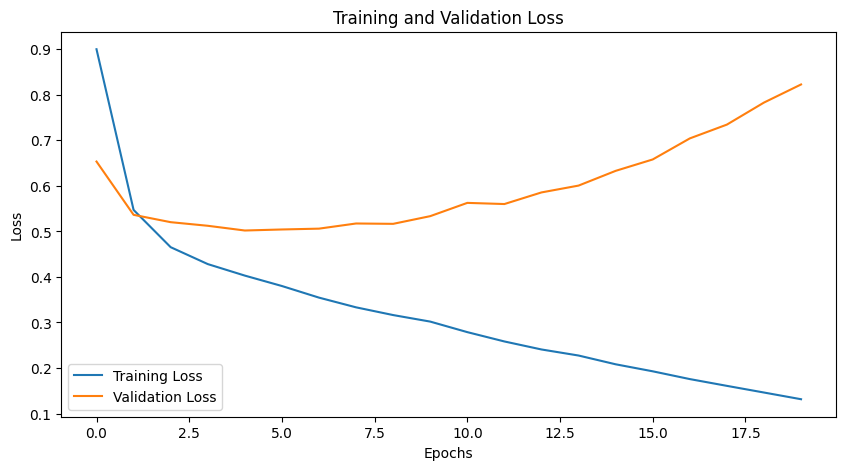

In [39]:
with open('G:\\VietNamese-Sentiment-Analyst\\train\\CNN-LSTM-weights.pkl', 'rb') as file:
    history_lstm = pickle.load(file)
plt.figure(figsize=(10, 5))
plt.plot(history_lstm ['loss'], label='Training Loss')
plt.plot(history_lstm ['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [40]:
# Importing classification report and confussion matrix
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def confusion(y_test, y_pred):
    sns.set_theme(style= "whitegrid")
    plt.rcParams["figure.figsize"] = [5,3]
    plt.rcParams["figure.autolayout"] = True
    data = confusion_matrix(y_test,y_pred)
    df_cm = pd.DataFrame(data)
    df_cm.index.name = "Actual"
    df_cm.columns.name = "Predicted"
    cm = sns.heatmap(df_cm,annot=True, fmt="g")
    cm.plot()

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       894
           1       0.27      0.12      0.16       221
           2       0.85      0.91      0.88      1109

    accuracy                           0.81      2224
   macro avg       0.65      0.63      0.63      2224
weighted avg       0.78      0.81      0.79      2224



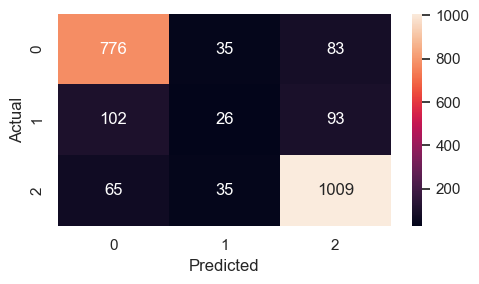

In [41]:
print(classification_report(y_test_encoded, predict_labels))
confusion(y_test_encoded, predict_labels)